### Student Information
Name: 魏士勛

Student ID: 114062587

GitHub ID: welly2140

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
df = df[['text', 'label']]
df

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [3]:
# Basic info
print(df.shape)      # number of rows and columns
print(df['label'].value_counts())   # distribution of sentiment
df.isnull().sum()            # check missing values

(847, 2)
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


text     0
label    0
dtype: int64

In [4]:
# Sampling
df_sample = df.sample(n = 100, random_state = 42)
df_sample

,text,label
457,"""We"" who?",0.0
342,Chicken jockey,0.0
280,Not great Bob,-1.0
275,"Speak for yourself, my wife is being harder on...",0.0
843,Where can I read this?,0.0
...,...,...
137,Why is he signing his tweets like he's quoting...,-1.0
299,Fairly,0.0
360,"My day trading: Watching TBBB, COIN and PLTR. ...",-1.0
76,Americans are so brain dead lol,-1.0


In [5]:
# CountVectorizer to build term-document matrix
count_vect = CountVectorizer(stop_words = "english", max_features = 2000) 
X_counts = count_vect.fit_transform(df_sample['text'])
X_counts.shape

(100, 988)

In [6]:
# Example: check vocab
count_vect.get_feature_names_out()[:20]

array(['000', '02', '03', '10', '100', '10yr', '11', '125', '13', '15',
       '17', '17th', '20', '200', '200k', '2025', '21', '22', '22rate',
       '23'], dtype=object)

In [7]:
# Check term frequency distribution
term_freq = np.asarray(X_counts.sum(axis = 0)).ravel()
top_idx = term_freq.argsort()[-20 : ]  # top 20 frequent terms
top_terms = [count_vect.get_feature_names_out()[i] for i in top_idx]
top_terms

['want',
 'won',
 'think',
 'growth',
 'evgo',
 'ev',
 'don',
 'silver',
 'right',
 'charging',
 'sell',
 'money',
 'just',
 'trading',
 'china',
 'market',
 'company',
 'tariffs',
 'trump',
 'like']

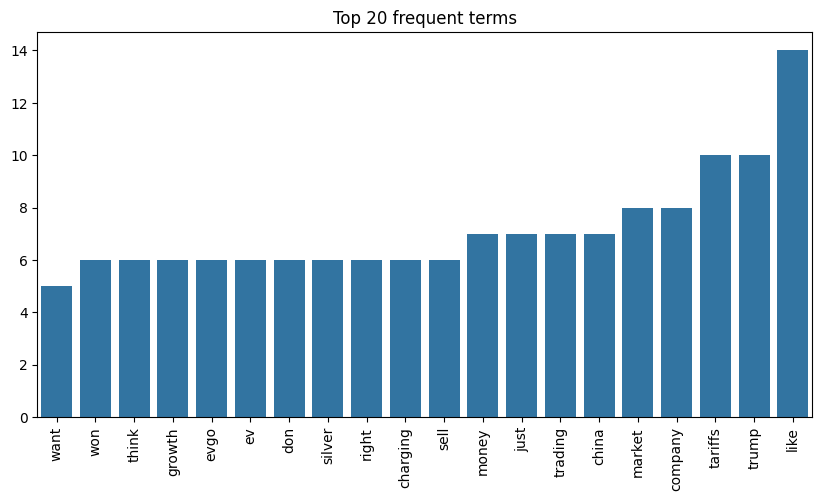

In [8]:
# Plot bar chart of top 20 frequent terms chart
plt.figure(figsize=(10, 5))
sns.barplot(x = top_terms, y = term_freq[top_idx])
plt.xticks(rotation = 90)
plt.title("Top 20 frequent terms")
plt.show()

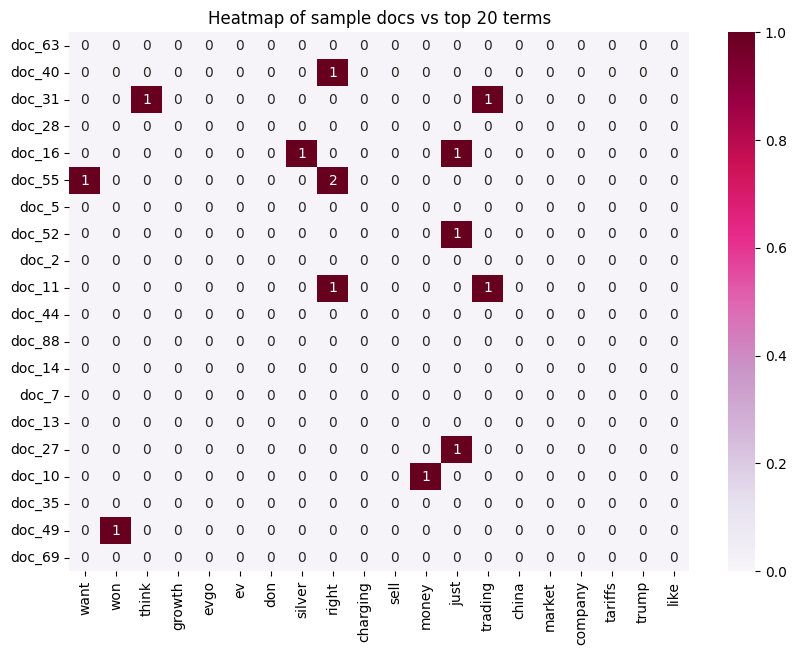

In [9]:
# Plot heatmap of documents vs top 20 frequent terms
docs_idx = np.random.choice(X_counts.shape[0], 20, replace = False)
plot_z = X_counts[docs_idx, :][:, top_idx].toarray()
plot_y = [f"doc_{i}" for i in docs_idx]

df_todraw = pd.DataFrame(plot_z, columns = top_terms, index = plot_y)
plt.figure(figsize = (10, 7))
sns.heatmap(df_todraw, cmap = "PuRd", vmin = 0, vmax = 1, annot = True)
plt.title("Heatmap of sample docs vs top 20 terms")
plt.show()

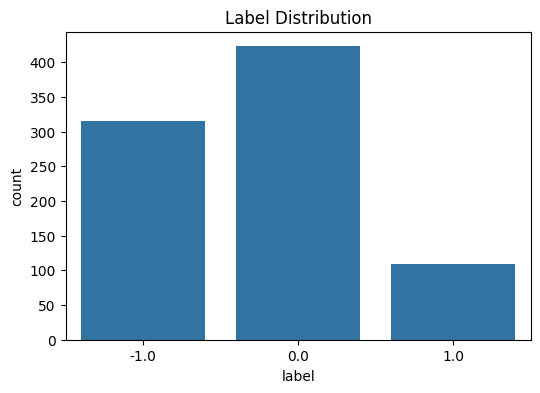

In [10]:
# Label distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

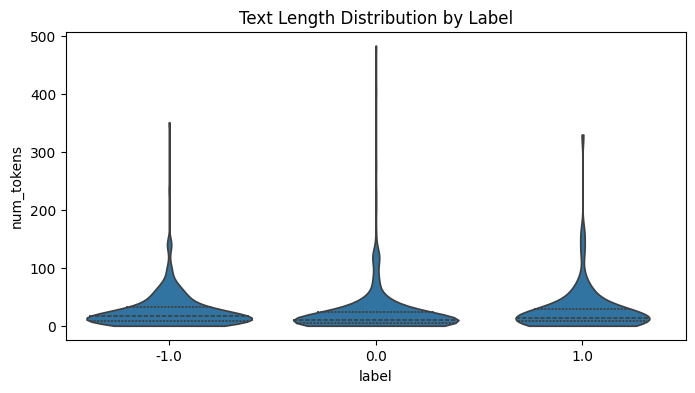

In [11]:
# Text length distribution by label
df['text_len'] = df['text'].astype(str).str.split().map(len)

plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='label', y='text_len', cut=0, inner='quartile')
plt.title("Text Length Distribution by Label")
plt.xlabel("label")
plt.ylabel("num_tokens")
plt.show()

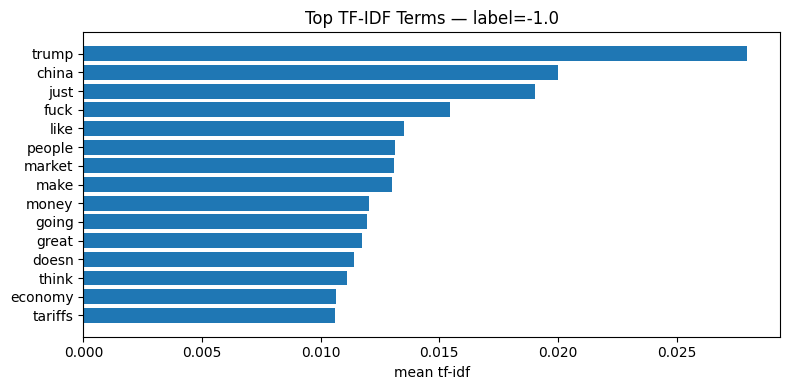

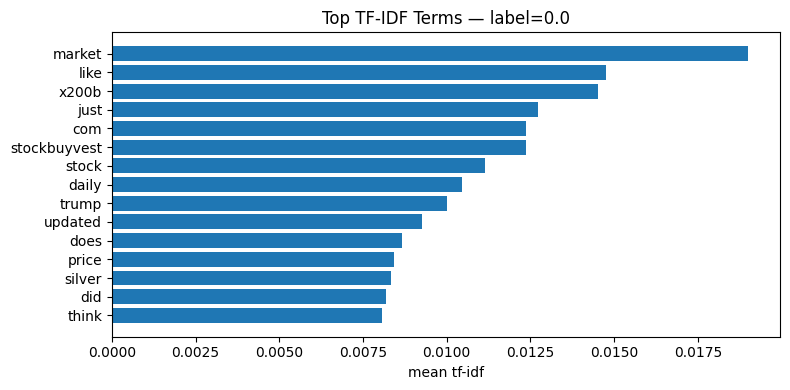

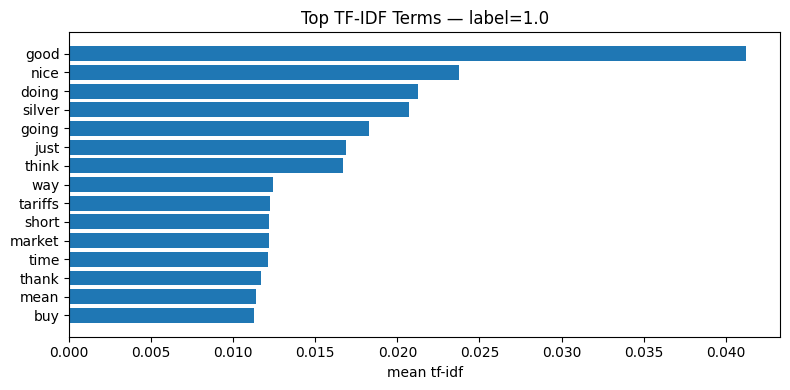

In [12]:
# Top TF-IDF terms per label
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(df['text'].astype(str))
vocab = np.array(tfidf.get_feature_names_out())

def plot_top_tfidf_per_label(df, X, vocab, topk=15):
    labels = df['label'].unique()
    for lab in labels:
        idx = np.where(df['label'].values == lab)[0]
        if len(idx) == 0:
            continue
        class_mean = np.asarray(X[idx].mean(axis=0)).ravel()
        top_idx = class_mean.argsort()[-topk:][::-1]
        plt.figure(figsize=(8,4))
        plt.barh(vocab[top_idx][::-1], class_mean[top_idx][::-1])
        plt.title(f"Top TF-IDF Terms — label={lab}")
        plt.xlabel("mean tf-idf")
        plt.tight_layout()
        plt.show()

plot_top_tfidf_per_label(df, X_tfidf, vocab, topk=15)

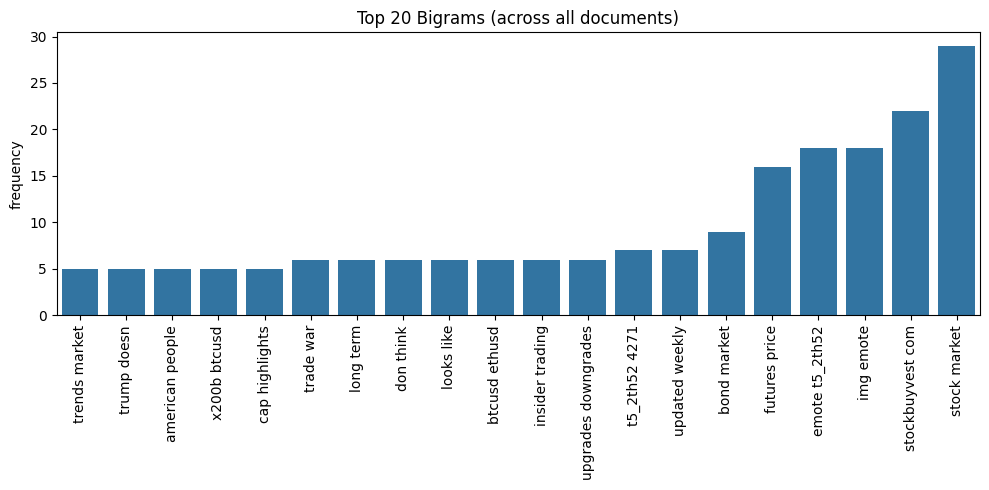

In [13]:
# Bigram frequency (n-grams)
bigram_vec = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=5000)
X_bi = bigram_vec.fit_transform(df['text'].astype(str))
bi_vocab = np.array(bigram_vec.get_feature_names_out())
bi_freq = np.asarray(X_bi.sum(axis=0)).ravel()
top_idx = bi_freq.argsort()[-20:]
plt.figure(figsize=(10,5))
sns.barplot(x=bi_vocab[top_idx], y=bi_freq[top_idx])
plt.xticks(rotation=90)
plt.title("Top 20 Bigrams (across all documents)")
plt.ylabel("frequency")
plt.xlabel("")
plt.tight_layout()
plt.show()

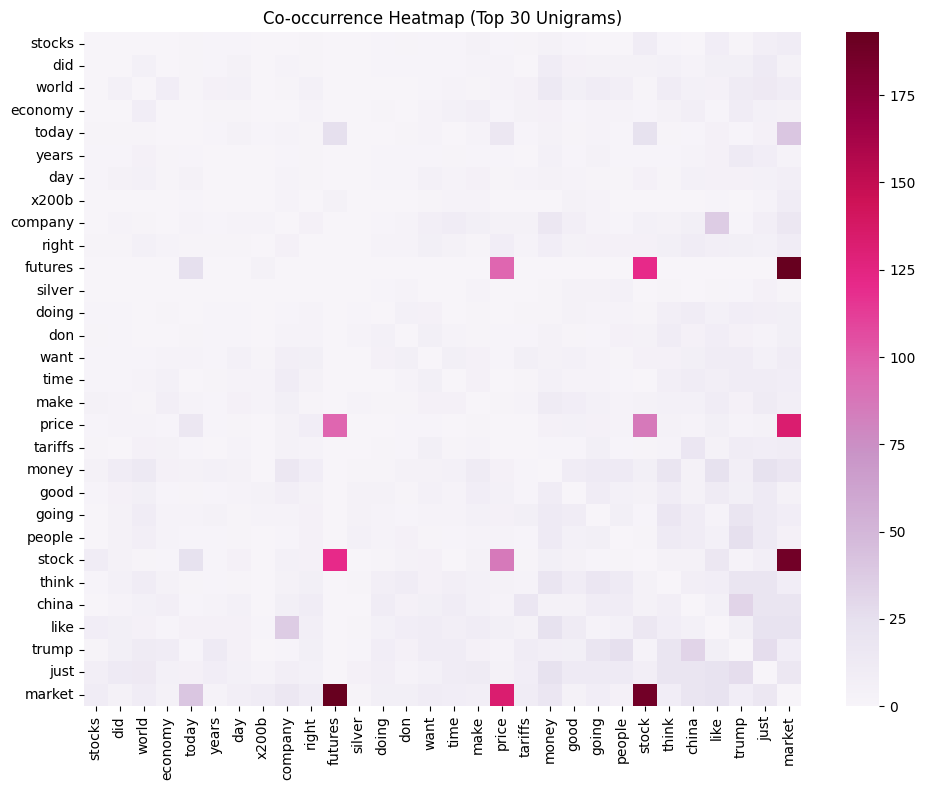

In [ ]:
# Word co-occurrence heatmap
count_vec_full = CountVectorizer(stop_words="english", max_features=3000)
X_full = count_vec_full.fit_transform(df['text'].astype(str))
full_vocab = np.array(count_vec_full.get_feature_names_out())

term_freq = np.asarray(X_full.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[-30:]         
X_top = X_full[:, top_idx]

C = (X_top.T @ X_top).toarray().astype(float)
np.fill_diagonal(C, 0)

plt.figure(figsize=(10,8))
sns.heatmap(C, xticklabels=full_vocab[top_idx], yticklabels=full_vocab[top_idx], cmap="PuRd")
plt.title("Co-occurrence Heatmap (Top 30 Unigrams)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Phase 2

In [1]:
### Begin Assignment Here
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

In [2]:
# Load dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
df = df[['text', 'label']].dropna()

In [3]:
# Count Vectorizer (Word Frequency)
count_vect = CountVectorizer(stop_words='english', max_features=2000)
X_count = count_vect.fit_transform(df['text'])

# TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf = tfidf_vect.fit_transform(df['text'])

y = df['label']

In [4]:
# Split dataset
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.3, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [6]:
# MultinomialNB with Count features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)

print("=== Naive Bayes (CountVectorizer) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))
print("\n")

=== Naive Bayes (CountVectorizer) ===
Accuracy: 0.5568627450980392
              precision    recall  f1-score   support

        -1.0       0.53      0.64      0.58        98
         0.0       0.61      0.62      0.62       121
         1.0       0.27      0.11      0.16        36

    accuracy                           0.56       255
   macro avg       0.47      0.46      0.45       255
weighted avg       0.53      0.56      0.54       255





In [7]:
# BernoulliNB with TF-IDF features
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf.toarray(), y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf.toarray())

print("=== Naive Bayes (TF-IDF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))
print("\n")

=== Naive Bayes (TF-IDF) ===
Accuracy: 0.49019607843137253
              precision    recall  f1-score   support

        -1.0       0.53      0.23      0.33        98
         0.0       0.50      0.82      0.62       121
         1.0       0.21      0.08      0.12        36

    accuracy                           0.49       255
   macro avg       0.42      0.38      0.36       255
weighted avg       0.47      0.49      0.44       255





/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  

In [8]:
# Augmented Features (TF-IDF + Pattern Matrix)
pattern_matrix = X_tfidf.copy()
X_aug = hstack([X_tfidf, pattern_matrix])  

X_train_aug, X_test_aug, y_train, y_test = train_test_split(X_aug, y, test_size=0.3, random_state=42)

nb_aug = BernoulliNB()
nb_aug.fit(X_train_aug.toarray(), y_train)
y_pred_aug = nb_aug.predict(X_test_aug.toarray())

print("=== Naive Bayes (Augmented: TF-IDF + Patterns) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_aug))
print(classification_report(y_test, y_pred_aug))

=== Naive Bayes (Augmented: TF-IDF + Patterns) ===
Accuracy: 0.48627450980392156
              precision    recall  f1-score   support

        -1.0       0.51      0.23      0.32        98
         0.0       0.50      0.81      0.62       121
         1.0       0.20      0.08      0.12        36

    accuracy                           0.49       255
   macro avg       0.40      0.38      0.35       255
weighted avg       0.46      0.49      0.43       255



/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/wellywei/Desktop/Data Mining/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  

In [ ]:
The CountVectorizer model achieved the best performance (accuracy ≈ 0.56), while both TF-IDF and augmented models performed slightly worse (~0.49). 
This suggests that simple word frequency features are more effective for short, informal Reddit posts where common words still carry significant sentiment information. 
TF-IDF down-weights these frequent terms, reducing predictive power. The augmented model did not improve results, likely due to feature redundancy or noise. 
Overall, MultinomialNB with word frequency remains the most suitable choice for this dataset.

In [ ]:
Some parts of the preprocessing could be improved.
The tokenization was quite basic, so using a better tool like spaCy or NLTK would help handle special cases and punctuation more accurately.
Lemmatization or stemming should also be added so that words like “run” and “running” are treated as the same term.
In addition, removing more stopwords and cleaning noisy tokens such as URLs, tickers, or emojis would make the data cleaner.
Finally, the feature space can be reduced using TF-IDF filtering or feature selection to focus on the most informative terms.
These changes would make preprocessing more efficient and improve classification results.